In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
class LineModel:
    # The minimum number of coefficients needed to estimate a model
    n_minimum_coeffs = 2
    
    @classmethod
    def fit(cls, data):
        xs, ys = data[:,1], data[:,0]
        mx, my = np.mean(xs), np.mean(ys)
        
        variance = np.sum((xs - mx) * (ys - my))
        covariance = np.sum((xs - mx)**2)
        m = variance / covariance
        b = my - m*mx
        
        return m, b
    
    @classmethod
    def predict(cls, x, params):
        m, b = params
        return m*x + b
    
    @classmethod
    def loss(cls, data, params):
        """Calculate Mean Squared Error on `data` for `params = (m, b)`"""
        if data.ndim == 2:
            x = data[:,1]
            y_true = data[:,0]
            y_pred = cls.predict(x, params)
        else:
            x = data[1]
            y_true = data[0]
            y_pred = cls.predict(x, params)
        return np.mean((y_true - y_pred)**2)

In [3]:
def ransac(data, model, n_iterations, threshold, percentage_inliers):
    params = []
    consensus_sizes = []
    
    for _ in range(n_iterations):
        
        subset = np.random.permutation(data)[:model.n_minimum_coeffs]
        params_subset = model.fit(subset)
        losses = [model.loss(p, params_subset) for p in data]
        
        consensus_set = np.array([p for (p, loss) in zip(data, losses) if loss < threshold])
        consensus_size = len(consensus_set)
        
        if consensus_size / len(data) < percentage_inliers or consensus_size < model.n_minimum_coeffs:
            continue
            
        params_consensus = model.fit(consensus_set)
        params.append(params_consensus)
        consensus_sizes.append(consensus_size)
    
    return params[np.argmax(consensus_sizes)]
    
    return params, consensus_sizes
    

In [4]:
POINTS = np.array([
    [0, 0],
    [1, 1],
    [2, 2],
    [1.1, 1],
    [3, 0],
    [4, 4],
    [4, 6],
    [8, 4]
])

In [5]:
m, b = ransac(POINTS, LineModel, 10, .5, 0)

In [6]:
def plot_regression(data, m, b):
    plt.scatter(POINTS[:,1], POINTS[:,0])
    xs = np.linspace(np.min(POINTS[:,1]), np.max(POINTS[:,1]))
    ys = [m*x + b for x in xs]
    plt.plot(xs, ys, color="r")

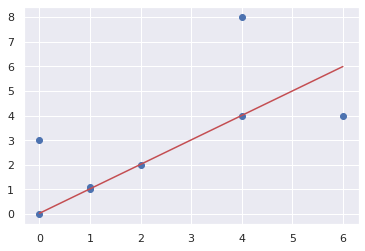

In [7]:
plot_regression(POINTS, m, b)